In [23]:
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Preparation

In [24]:
# File path
file = './Resources/crypto_data.csv'

In [25]:
# Read data
df = pd.read_csv(file)
df.sample(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
980,UWC,Uwezocoin,Scrypt,False,PoW,0.000000e+00,840000000
528,EQUAL,EqualCoin,X13,True,PoW/PoS,NaN,1000000000
695,DBIX,DubaiCoin,Dagger-Hashimoto,True,PoW,2.232901e+06,2232901
920,TRF,Travelflex,Dagger,True,PoW,1.073253e+08,100000000
65,CINNI,CINNICOIN,Scrypt,True,PoW,NaN,15000000
1202,TRI,Triangles Coin,X13,True,PoW/PoS,1.407778e+05,120000
79,DSB,DarkShibe,Scrypt,True,PoW,0.000000e+00,2043962
529,2BACCO,2BACCO Coin,Scrypt,True,PoW/PoS,NaN,81454545
483,PSB,PesoBit,Scrypt,True,PoW/PoS,3.352296e+07,0
787,ACC,AdCoin,Scrypt,True,PoW,3.264673e+07,100000000


In [26]:
# Discard all cryptocurrencies that are not being traded
df.drop(df.index[df['IsTrading'] == False], inplace = True)

In [27]:
# Drop the IsTrading column from the dataframe
df.drop(['IsTrading'], axis = 1, inplace = True)

In [28]:
# Count of rows with null values
for column in df.columns:
    print(f'Column {column} has {df[column].isnull().sum()} null values')

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [29]:
# Remove all rows that have at least one null value
df = df.dropna(how='any')

In [30]:
# Filter for cryptocurrencies that have been mined
df.drop(df.index[df['TotalCoinsMined'] <= 0], inplace = True)

In [31]:
# Delete the CoinName from the dataframe
df.drop(['CoinName'], axis=1, inplace = True)

In [32]:
# Delete the Unnamed from the dataframe
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [36]:
# Convert TotalCoinSupply from 'object' to 'float64'
df['TotalCoinSupply']=df['TotalCoinSupply'].astype(float)

In [37]:
# Convert the remaining features with text values, Algorithm and ProofType, into numerical data
numerical_df =  pd.get_dummies(df, columns=['Algorithm','ProofType'], drop_first=True)
numerical_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Standardize the dataset with StandarScaler
standarized = StandardScaler().fit_transform(numerical_df)

# Also could standarize it like this:
# standarized_df = (numerical_df-numerical_df.mean())/numerical_df.std()

## Dimensionality Reduction

In [39]:
# Dimensionality reduction with PCA
pca = PCA(n_components=0.9)
pca_array = pca.fit_transform(standarized)

In [40]:
# Transform PCA data to a DataFrame to see features
pca_df = pd.DataFrame(data=pca_array)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335914,1.043405,-0.537409,0.001347,7.044362e-14,-8.714740e-15,-0.013578,-1.329940,-0.053106,-0.333927,...,2.934328e-15,2.434496e-15,2.487027e-15,9.790269e-16,-3.468535e-15,5.620176e-15,5.089347e-15,-6.142772e-15,9.198061e-16,-2.310364e-15
1,-0.319249,1.043547,-0.537804,0.001337,7.045326e-14,-8.731066e-15,-0.014190,-1.332705,-0.057966,-0.330612,...,2.804558e-15,2.850274e-15,2.097958e-15,8.656337e-16,-3.420764e-15,5.449385e-15,4.814896e-15,-6.192565e-15,1.233358e-15,-2.287351e-15
2,2.304716,1.669996,-0.624077,0.004420,1.091008e-13,-1.482739e-14,-0.062312,-1.554093,-0.945690,0.375087,...,4.253182e-14,-5.451376e-14,-6.953702e-15,-1.178457e-14,-2.213607e-14,5.629484e-14,-2.202371e-13,6.063621e-14,-1.153074e-14,2.791709e-14
3,-0.145455,-1.323925,0.177429,-0.001167,-2.770382e-14,3.303192e-15,0.000326,0.283548,0.252906,-0.079820,...,1.259610e-14,-5.735513e-15,-4.278538e-15,-8.689696e-15,-5.091938e-15,1.631924e-14,-4.255179e-14,1.286336e-14,-3.613047e-15,1.298285e-14
4,-0.151951,-2.044976,0.364208,-0.001636,-5.536610e-14,5.409159e-15,0.032350,0.524429,0.191031,0.074021,...,9.196044e-14,2.759134e-14,1.051899e-13,-7.155033e-15,9.718189e-15,-4.063729e-15,-1.812442e-13,-9.815111e-15,-4.360231e-14,7.167421e-14


The number of features went down from 96 to 74, which is expected because I preserved 90% of the variance.

In [41]:
# Reduce the dataset dimensions with t-SNE
tsne = TSNE(learning_rate=100)
tsne_features = tsne.fit_transform(pca_array)
tsne_df = pd.DataFrame(data=tsne_features)
tsne_df.head()

,0,1
0,15.073603,-8.153062
1,17.333559,-10.639864
2,26.191563,-11.314182
3,-32.825237,7.004929
4,1.825307,15.770762


In [42]:
# Check that dimensions have been reduced to two
tsne_features.shape

(532, 2)

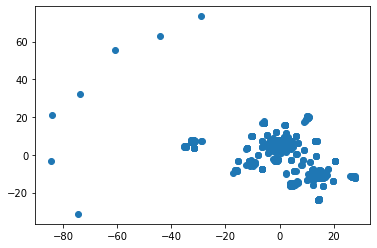

In [43]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

It looks like there could be three clusters, but also there are random points which don't really fit into possible clusters. Let's do an elbow curve to see what is the number of clusters it could be here, and then color them to visualize the groups.

## Cluster Analysis with k-Means

In [44]:
# Create an elbow plot to identify the best number of clusters
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_array)
    inertia.append(km.inertia_)

# Create the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,46445.752170
1,2,45188.226054
2,3,44121.450795
3,4,43528.429576
4,5,42458.985894


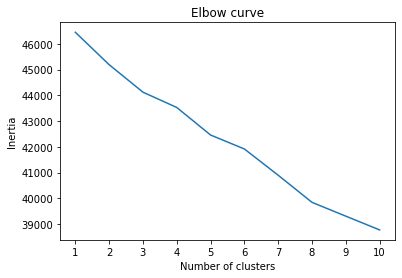

In [45]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

The elbow curve shows that there are no real patterns in the data (the curve doesn't flatten). So, we cannot define the number of clusters here. I come to conclussion that with the given dataset it is impossible to cluster cryptocurrencies together.

*I also tried to run non-reduced data to see if the elbow curve would change, but I received a similar curve.